In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
import glob
from PIL import Image

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.core import Flatten, Dense, Dropout, Lambda


Using TensorFlow backend.


In [2]:
from keras.preprocessing import image

BATCH_SIZE = 64
PATH="data/"

def get_fit_sample():
    gen = image.ImageDataGenerator()
    sample_batches = gen.flow_from_directory(PATH+'valid', target_size=(224,224), 
            class_mode='categorical', shuffle=False, batch_size=1000)
    imgs, labels = next(sample_batches)
    return imgs

gen = image.ImageDataGenerator(featurewise_std_normalization=True)
gen.fit(get_fit_sample())
val_batches = gen.flow_from_directory(PATH+'valid', target_size=(224,224), 
            class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)

gen = image.ImageDataGenerator(featurewise_std_normalization=True, horizontal_flip=True, channel_shift_range=100, zoom_range=0.5)
gen.fit(get_fit_sample())
batches = gen.flow_from_directory(PATH+'train', target_size=(224,224), 
            class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)

# from utils import plots
#imgs,labels = next(batches)
#plots(imgs[:2])


Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 24000 images belonging to 2 classes.


In [3]:


CLASSES = 2
INPUT_SHAPE = (224,224,3)
model = Sequential()
    
# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', input_shape=INPUT_SHAPE))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

# Classification block
model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu', name='fc1'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu', name='fc2'))
model.add(Dropout(0.5))
model.add(Dense(CLASSES, activation='softmax', name='predictions'))

from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=0.0005, momentum=0.9, nesterov=False)


model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])

Epoch 1/10
1000/1000 [==============================] - 1389s - loss: 0.2434 - acc: 0.5555 - val_loss: 0.2428 - val_acc: 0.5931
Epoch 2/10
1000/1000 [==============================] - 1393s - loss: 0.2198 - acc: 0.6457 - val_loss: 0.1983 - val_acc: 0.6839
Epoch 3/10
1000/1000 [==============================] - 1392s - loss: 0.2028 - acc: 0.6879 - val_loss: 0.1795 - val_acc: 0.7329
Epoch 4/10
1000/1000 [==============================] - 1392s - loss: 0.1891 - acc: 0.7150 - val_loss: 0.1647 - val_acc: 0.7609
Epoch 5/10
1000/1000 [==============================] - 1380s - loss: 0.1716 - acc: 0.7474 - val_loss: 0.1418 - val_acc: 0.8040
Epoch 6/10
1000/1000 [==============================] - 1382s - loss: 0.1550 - acc: 0.7758 - val_loss: 0.1246 - val_acc: 0.8340
Epoch 7/10
1000/1000 [==============================] - 1382s - loss: 0.1390 - acc: 0.8000 - val_loss: 0.1065 - val_acc: 0.8519
Epoch 8/10
1000/1000 [==============================] - 1381s - loss: 0.1256 - acc: 0.8222 - val_loss: 0

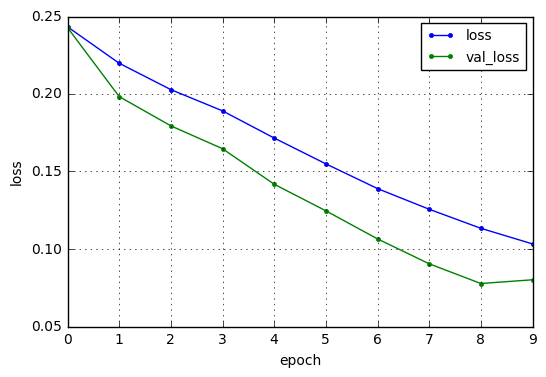

CPU times: user 3h 16min 45s, sys: 21min 57s, total: 3h 38min 42s
Wall time: 3h 50min 57s


In [4]:
%%time
hist = model.fit_generator(batches,  steps_per_epoch=1000, epochs=10, validation_data=val_batches, validation_steps=1000)
 
model.save('ConvNet-D-vgg16-large-dataset.h5')

# http://qiita.com/TypeNULL/items/4e4d7de11ab4361d6085
loss = hist.history['loss']
val_loss = hist.history['val_loss']
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

10 Epochまで行って、[ConvNet-D-vgg16-large-dataset](ConvNet-D-vgg16-large-dataset.ipynb) ほど性能が出ていない。
25 Epochまで、実行してみる


Epoch 1/15
1000/1000 [==============================] - 1359s - loss: 0.0909 - acc: 0.8741 - val_loss: 0.0628 - val_acc: 0.9160
Epoch 2/15
1000/1000 [==============================] - 1359s - loss: 0.0849 - acc: 0.8828 - val_loss: 0.0589 - val_acc: 0.9101
Epoch 3/15
1000/1000 [==============================] - 1357s - loss: 0.0790 - acc: 0.8918 - val_loss: 0.0526 - val_acc: 0.9300
Epoch 4/15
1000/1000 [==============================] - 1357s - loss: 0.0752 - acc: 0.8974 - val_loss: 0.0518 - val_acc: 0.9280
Epoch 5/15
1000/1000 [==============================] - 1356s - loss: 0.0705 - acc: 0.9030 - val_loss: 0.0455 - val_acc: 0.9420
Epoch 6/15
1000/1000 [==============================] - 1354s - loss: 0.0686 - acc: 0.9056 - val_loss: 0.0439 - val_acc: 0.9398
Epoch 7/15
1000/1000 [==============================] - 1354s - loss: 0.0646 - acc: 0.9119 - val_loss: 0.0406 - val_acc: 0.9419
Epoch 8/15
1000/1000 [==============================] - 1353s - loss: 0.0622 - acc: 0.9157 - val_loss: 0

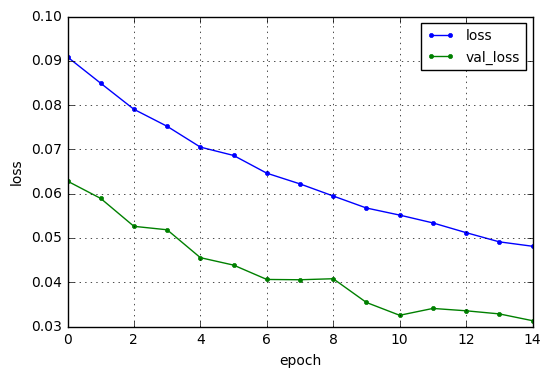

CPU times: user 4h 51min 19s, sys: 33min 3s, total: 5h 24min 23s
Wall time: 5h 39min 51s


In [14]:
%%time
from keras.models import load_model
#model = load_model('ConvNet-D-vgg16-large-dataset.h5')
hist2 = model.fit_generator(batches,  steps_per_epoch=1000, epochs=15, validation_data=val_batches, validation_steps=1000)
 
model.save('ConvNet-D-vgg16-large-dataset_2.h5')

import utils
utils.plot_hist(hist2)

In [22]:
import bcolz
#https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py#L175
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()

save_array("hist.dat", hist.history)
save_array("hist2.dat", hist2.history)

## ２つの曲線をつなげてみる。

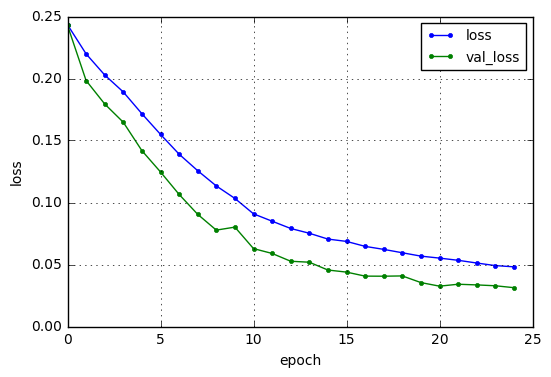

In [26]:
# http://qiita.com/TypeNULL/items/4e4d7de11ab4361d6085
loss = hist.history['loss'] + hist2.history['loss']
val_loss = hist.history['val_loss'] + hist2.history['val_loss']
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## prediction

In [27]:
%%time
# Prediction

gen = image.ImageDataGenerator(featurewise_std_normalization=True)
gen.fit(get_fit_sample())
test_batches = gen.flow_from_directory(PATH+'test', target_size=(224,224), 
           class_mode=None, shuffle=False, batch_size=BATCH_SIZE)
print(test_batches.samples)

preds = model.predict_generator(test_batches, test_batches.samples / BATCH_SIZE, verbose=1)



Found 1000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
12500
196/195 [==============================] - 60s    
CPU times: user 31.2 s, sys: 2.65 s, total: 33.9 s
Wall time: 1min 3s


## kaggle 形式に

In [28]:
filenames = test_batches.filenames
isdog = preds[:,1]
isdog_clipped = isdog.clip(min=0.05, max=0.95)
ids = np.array([int(f[8:f.find('.')]) for f in filenames])
subm = np.stack([ids,isdog_clipped], axis=1)
subm[:5]
from IPython.display import FileLink

np.savetxt(PATH + "results/submission3_aug.csv", subm, fmt='%d,%.5f', header='id,label', comments='')
FileLink(PATH + "results/submission3_aug.csv")

/home/ikeyasu/work/til/cnn_dogs_cats/data/results/submission3_aug.csv